# Logistic Regression

#### Learning Objectives
- Understand how to apply machine learning model to classification tasks
- Explain the working mechanism of LogisticRegression: probability output, log-likelyhood etc...
- Explain performance metric for classification tasks
- Dataset available: Titanic dataset

#### Introduction to Logistic Regression

- Eventhough there is the word `regression` in the name of the algorithm, this is a classification learning algorithm. The `regression` here stems from the fact that the formula of the algorithm is similar to that of linear regression.
- If the output label only has 2 different classes, then it is considered binary classification. If there are more than two different classes, it is multi-class classification
- Let's start with a simple example of binary classification (2 classes) using a toy dataset to classify student's admission to university based on 2 exam scores
<center><img src='./assets/linear_classifier.png' width="500"></center>

So what is the difference between linear regression and logistic regression? In linear regression problems, the target variable $y$ is a continuous value (e.g $y \in \mathbb{R}$). While in classification tasks, the output labels are in a discrete set of values. (e.g $y \in  \{-1,1\}$ in binary classification, or $y \in \{1,2, \ldots, k\}$ for multi-class classification with $k$ different classes). 
In logistic classification, the output label is also a function of the linear combination of input features. However, it needs to be scaled and interpreted as a probability of belonging to certain classes. Let us denote $p_n = P(y = 1)$ as the probability of the output $y$ equals to a class (e.g classify an email as spam/ham). Let's reuse the simple 1-D example from Linear Regression with some modifications to model the Logistic Regression function.

$$p_n = \sigma(\beta_0 + \beta_1x)$$

$\sigma(.)$ is called a sigmoid function or a logistic function which serves the task of scaling the linear combination of input features to be between 0 and 1 which matches the range of a probability value. The predicted class $\hat{y}$ is 1 if $p_n >= 0.5$ and 0 if $p_n < 0.5$.
The value of the logistic function is as the below graph. If $t > 0$ then the output of $\sigma(t)$ is positive, and it is negative if $t < 0$. It outputs $1/2$ if $t = 0$. In other words, if the linear combination of input features is positive, then the predicted output is 1, otherwise the predicted output is 0. (This is related to the vector of the hyperplane that classifies the data. Interested readers can look at the references materials).

<center><img src='./assets/sigmoid_function.png' width="500"></center>

In summary:

- Logistic regression outputs the probabilities of a specific class.
- Those probabilities can be converted into class predictions.

The logistic function has some nice properties:

- Takes on an "s" shape
- Output is bounded by 0 and 1

We are going to use Logistic Regression model to classify whether a student's performance on two exams can get him/her accepted to a university. The input features are the scores of exam 1 and 2. The output label will be either accepted `(1)` or not accepted `(0)`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# start by loading the data
data = pd.read_csv("data/logistic/data1.txt", header = None, 
                   names = ["Exam 1 Score", "Exam 2 Score", "Accepted"])

# initialize some useful variables
m = len(data["Accepted"])
#x0 = np.ones(m)
exam1 = np.array((data["Exam 1 Score"]))
exam2 = np.array((data["Exam 2 Score"]))
#X = np.array([x0, exam1, exam2]).T
X = np.array([exam1, exam2]).T
y = np.array(data["Accepted"]).reshape((m,1))
m, n = X.shape

X.shape, y.shape

((100, 2), (100, 1))

In [3]:
print("The scores of first 10 student:", X[:10], sep='\n')
print("The acceptance of first 10 student:", y[:10], sep='\n')

The scores of first 10 student:
[[34.62365962 78.02469282]
 [30.28671077 43.89499752]
 [35.84740877 72.90219803]
 [60.18259939 86.3085521 ]
 [79.03273605 75.34437644]
 [45.08327748 56.31637178]
 [61.10666454 96.51142588]
 [75.02474557 46.55401354]
 [76.0987867  87.42056972]
 [84.43281996 43.53339331]]
The acceptance of first 10 student:
[[0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]]


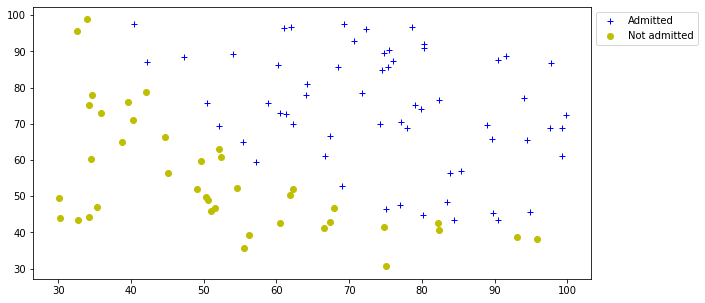

In [4]:
# Visualise the data
# Find indices of positive and negative examples
pos = np.where(y==1)[0]
neg = np.where(y==0)[0]

plt.figure(figsize=(10,5))
# Plot examples
plt.plot(X[pos, 0], X[pos, 1], 'b+', label='Admitted')
plt.plot(X[neg, 0], X[neg, 1], 'yo', label='Not admitted')
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.show()

The data looks like it is linearly separable. Let's use Logistic Regression to find this line that classify the scores into 
Accepted/Not Accepted regions. 

In [5]:
# Fit a logistic regression model and store the class predictions.
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
logreg = LogisticRegression()
y = y.ravel() # to remove redundant dimensions from y

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test) # prediction via Log Reg

Similarly to Linear Regression, we can look at the model's coefficients through the model attributes.

In [6]:
logreg.coef_, logreg.intercept_

(array([[0.23098726, 0.23209393]]), array([-28.43703197]))

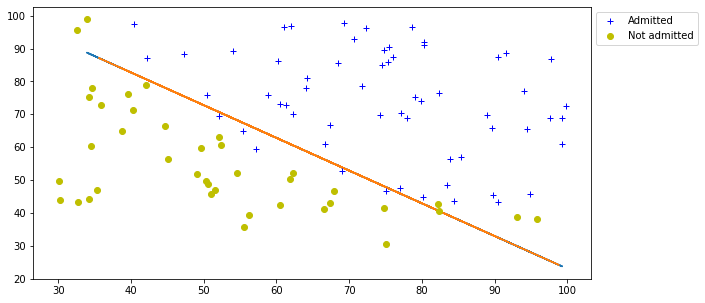

In [7]:
## Visualise the decision boundary
points_x = X_test

line_bias = logreg.intercept_
line_w = logreg.coef_.T
points_y=[(line_w[0]*x+line_bias)/(-1*line_w[1]) for x in points_x]

plt.figure(figsize=(10,5))
plt.plot(points_x, points_y)
# Plot examples
plt.plot(X[pos, 0], X[pos, 1], 'b+', label='Admitted')
plt.plot(X[neg, 0], X[neg, 1], 'yo', label='Not admitted')
plt.legend(bbox_to_anchor=(1.0, 1.0), loc='upper left')
plt.show()

Eventhough there might be some points misclassified, the line is still doing a pretty good job in keeping the majority of the points in the correct side.

#### Apply the LogisticRegression model into classifying survivorship of titanic passengers
- Apply the Logistic Regression on a Kaggle dataset called Titanic survivorship
- Given a set of passenger's attributes, we need to predict whether that passenger can stay alive from the disaster

In [8]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

sns.set(font_scale=1.5);
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14
plt.style.use("fivethirtyeight")

# Load the titanic dataset
titanic_train = pd.read_csv('data/titanic/train.csv')
titanic_test = pd.read_csv('data/titanic/test.csv')

In [9]:
print('The shape of train data: ', titanic_train.shape)
print('The shape of test data: ', titanic_test.shape)

The shape of train data:  (891, 12)
The shape of test data:  (418, 11)


Columns description of the titanic dataset:
<center><img src='./assets/titanic_columns.png' width="800"></center>

In [10]:
titanic_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
# Check for missing data in the training dataset: Age and Cabin contain quite alot of missing data, 20% and 77% respectively
titanic_train.isnull().sum() / titanic_train.shape[0]

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

- Because there are approximately 20% of missing data for Age, we should not ignore this variable. Let's figure out which values should we use to impute.
- On the other hand, there are upto 77% missing data for Cabin, there is no point to impute this column since it is hard to figure which value should we use.
- There are approximately 0.22% missing data for Embarked, we can just impute this column with the most occured value

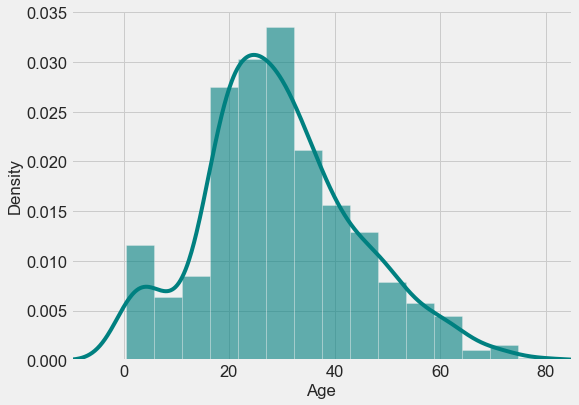

In [13]:
# For the Age variable:
ax = titanic_train["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
titanic_train["Age"].plot(kind='density', color='teal')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

In [14]:
# The Age distribution is slightly skewed to the right, using median value to impute seems better than the average
# As the median is smaller than the mean, the imputed value better represents the missing age
titanic_train['Age'].mean(), titanic_train['Age'].median()

(29.69911764705882, 28.0)

Boarded passengers grouped by port of embarking (C = Cherbourg, Q = Queenstown, S = Southampton):
S    644
C    168
Q     77
Name: Embarked, dtype: int64


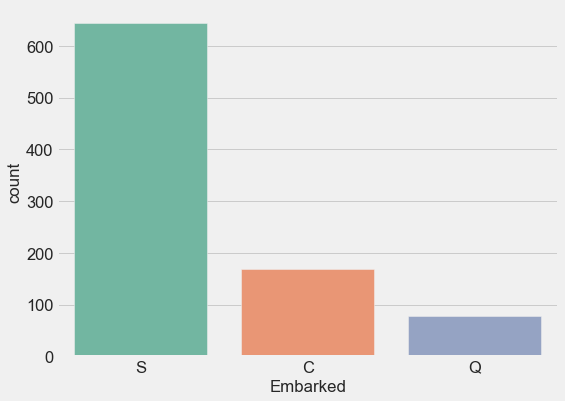

In [15]:
print('Boarded passengers grouped by port of embarking (C = Cherbourg, Q = Queenstown, S = Southampton):')
print(titanic_train['Embarked'].value_counts())
sns.countplot(x='Embarked', data=titanic_train, palette='Set2')
plt.show()

In [16]:
train_data = titanic_train.copy()
train_data["Age"].fillna(titanic_train["Age"].median(skipna=True), inplace=True)
train_data["Embarked"].fillna(titanic_train['Embarked'].value_counts().idxmax(), inplace=True)
train_data.drop('Cabin', axis=1, inplace=True)
train_data.shape

(891, 11)

In [17]:
# Double check to make sure there is no more missing data
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

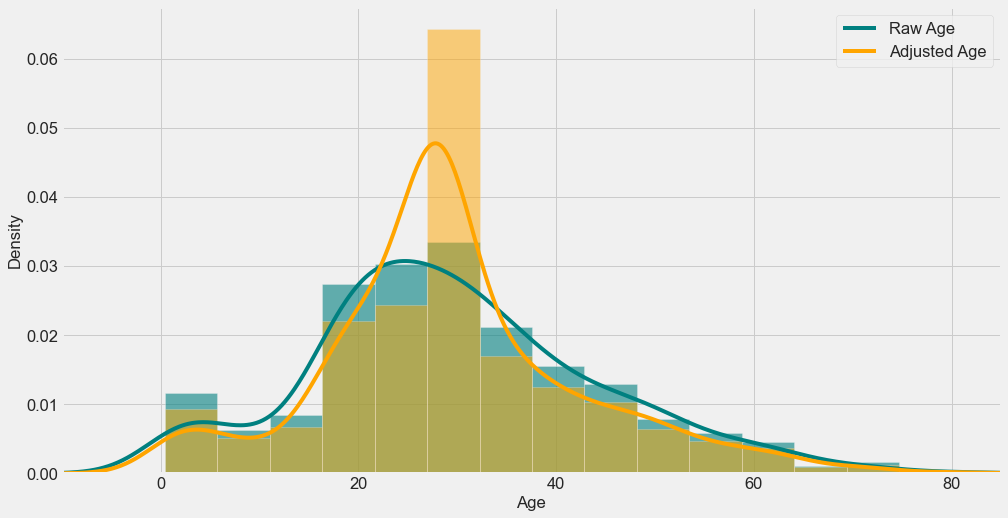

In [18]:
# Visualise adjusted age after modification, it looks closer to the bell curve of Gaussian distribution
plt.figure(figsize=(15,8))
ax = titanic_train["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
titanic_train["Age"].plot(kind='density', color='teal')
ax = train_data["Age"].hist(bins=15, density=True, stacked=True, color='orange', alpha=0.5)
train_data["Age"].plot(kind='density', color='orange')
ax.legend(['Raw Age', 'Adjusted Age'])
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

#### Feature Engineering

- Two features SibSp and Parch seems to relate to each other from the column description. One thing we can do is to create a new column representing the fact that the traveler is going alone or with company. Then we can drop these 2 columns

In [19]:
train_data['TravelAlone']=np.where((train_data["SibSp"]+train_data["Parch"])>0, 0, 1)
train_data.drop('SibSp', axis=1, inplace=True)
train_data.drop('Parch', axis=1, inplace=True)

In [20]:
## For other categorical columns, we are going to convert them into one-hot encoding vector
training=pd.get_dummies(train_data, columns=["Pclass","Embarked","Sex"])
training.drop('Sex_female', axis=1, inplace=True)
training.drop('PassengerId', axis=1, inplace=True)
training.drop('Name', axis=1, inplace=True)
training.drop('Ticket', axis=1, inplace=True)

final_train = training
final_train.to_csv('data/final_titanic_train.csv', index=False)
final_train.head()

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,7.2500,0,0,0,1,0,0,1,1
1,1,38.0,71.2833,0,1,0,0,1,0,0,0
2,1,26.0,7.9250,1,0,0,1,0,0,1,0
3,1,35.0,53.1000,0,1,0,0,0,0,1,0
4,0,35.0,8.0500,1,0,0,1,0,0,1,1


Finally, whatever changes we made to the train data, make sure we also do the same to the test data

In [21]:
test_data = titanic_test.copy()
test_data["Age"].fillna(titanic_train["Age"].median(skipna=True), inplace=True)
test_data["Fare"].fillna(titanic_train["Fare"].median(skipna=True), inplace=True) #Fare has 1 missing value in the test data
test_data.drop('Cabin', axis=1, inplace=True)

test_data['TravelAlone']=np.where((test_data["SibSp"]+test_data["Parch"])>0, 0, 1)

test_data.drop('SibSp', axis=1, inplace=True)
test_data.drop('Parch', axis=1, inplace=True)

testing = pd.get_dummies(test_data, columns=["Pclass","Embarked","Sex"])
testing.drop('Sex_female', axis=1, inplace=True)
testing.drop('PassengerId', axis=1, inplace=True)
testing.drop('Name', axis=1, inplace=True)
testing.drop('Ticket', axis=1, inplace=True)

final_test = testing
final_test.to_csv('data/final_titanic_test.csv', index=False)

final_test.head()

,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,34.5,7.8292,1,0,0,1,0,1,0,1
1,47.0,7.0000,0,0,0,1,0,0,1,0
2,62.0,9.6875,1,0,1,0,0,1,0,1
3,27.0,8.6625,1,0,0,1,0,0,1,1
4,22.0,12.2875,0,0,0,1,0,0,1,0


In [23]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss

# create X (features) and y (response)
X = final_train.loc[:, ~final_train.columns.isin(['Survived'])]
y = final_train['Survived']

# use train/test split with different random_state values
# we can change the random_state values that changes the accuracy scores
# the scores change a lot, this is why testing scores is a high-variance estimate
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# check classification scores of logistic regression
logreg = LogisticRegression(max_iter=5000) # need to increase max_iter to achieve convergence on training
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
y_pred_proba = logreg.predict_proba(X_test)[:, 1]
[fpr, tpr, thr] = roc_curve(y_test, y_pred_proba)
print('Train/Test split results:')
print(logreg.__class__.__name__+" accuracy is %2.3f" % accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__+" log_loss is %2.3f" % log_loss(y_test, y_pred_proba))


Train/Test split results:
LogisticRegression accuracy is 0.782
LogisticRegression log_loss is 0.507


We have presented two types of classification metrics: accuracy and log_loss. Accuracy tells the percentage of correctly identified label, while log-loss describes the loss of mis-classified labels. The higher the accuracy the better while the reverse is true for the latter one. 
Highest accuracy score on Kaggle competition is approximately 90%, which requires a lot of feature engineering, feature selection, gridsearch as well as ensembling learning. For our current baseline, we have 78.2% accuracy with basic engineering effort and modeling. We are going to see how we can improve the performance in subsequent parts.

<a id="advanced-classification-metrics"></a>
## Classification Metrics

---

When we evaluate the performance of a logistic regression (or any classifier model), the standard metric to use is accuracy: How many class labels did we guess correctly? However, accuracy is only one of several metrics we could use when evaluating a classification model.

$$Accuracy = \frac{total~predicted~correct}{total~predicted}$$

Accuracy alone doesn’t always give us a full picture.

If we know a model is 75% accurate, it doesn’t provide any insight into why the 25% was wrong.

Consider a binary classification problem where we have 165 observations/rows of people who are either smokers or nonsmokers.

<table style="border: none">
<tr style="border: none">
    <td style="border: none; vertical-align: bottom">n = 165</td>
    <td style=""><b>Predicted: No</b></td>
    <td style=""><b>Predicted: Yes</b></td>
</tr>
<tr>
    <td><b>Actual: No</b></td>
    <td style="text-align: center"></td>
    <td style="text-align: center"></td>
    <td style="text-align: center"></td>
</tr>
<tr>
    <td><b>Actual: Yes</b></td>
    <td style="text-align: center"></td>
    <td style="text-align: center"></td>
    <td style="text-align: center"></td>
</tr>
<tr style="border: none">
    <td style="border: none"></td>
    <td style="text-align: center"></td>
    <td style="text-align: center"></td>
</tr>

</table>

- **True positives (TP):** These are cases in which we predicted yes (smokers), and they actually are smokers.
- **True negatives (TN):** We predicted no, and they are nonsmokers.
- **False positives (FP):** We predicted yes, but they were not actually smokers. (This is also known as a "Type I error.")
- **False negatives (FN):** We predicted no, but they are smokers. (This is also known as a "Type II error.")
<table style="border: none">
<tr style="border: none">
    <td style="border: none; vertical-align: bottom">n = 165</td>
    <td style=""><b>Predicted: No</b></td>
    <td style=""><b>Predicted: Yes</b></td>
</tr>
<tr>
    <td><b>Actual: No</b></td>
    <td style="text-align: center">TN = 50</td>
    <td style="text-align: center">FP = 10</td>
    <td style="text-align: center">60</td>
</tr>
<tr>
    <td><b>Actual: Yes</b></td>
    <td style="text-align: center">FN = 5</td>
    <td style="text-align: center">TP = 100</td>
    <td style="text-align: center">105</td>
</tr>
<tr style="border: none">
    <td style="border: none"></td>
    <td style="text-align: center">55</td>
    <td style="text-align: center">110</td>
</tr>

</table>

There are other classification losses that we cannot cover in this part.